Creating maximum-visibility PowerPoint quantum computer evolution plot...
- Extra large fonts and markers for optimal screen readability
- High-resolution output (600 DPI) for crystal-clear projection
- Filled circles: Existing hardware (≤2025)
- Empty circles: Projected systems (>2025)
- Saving as both PNG (ultra high-res) and PDF formats


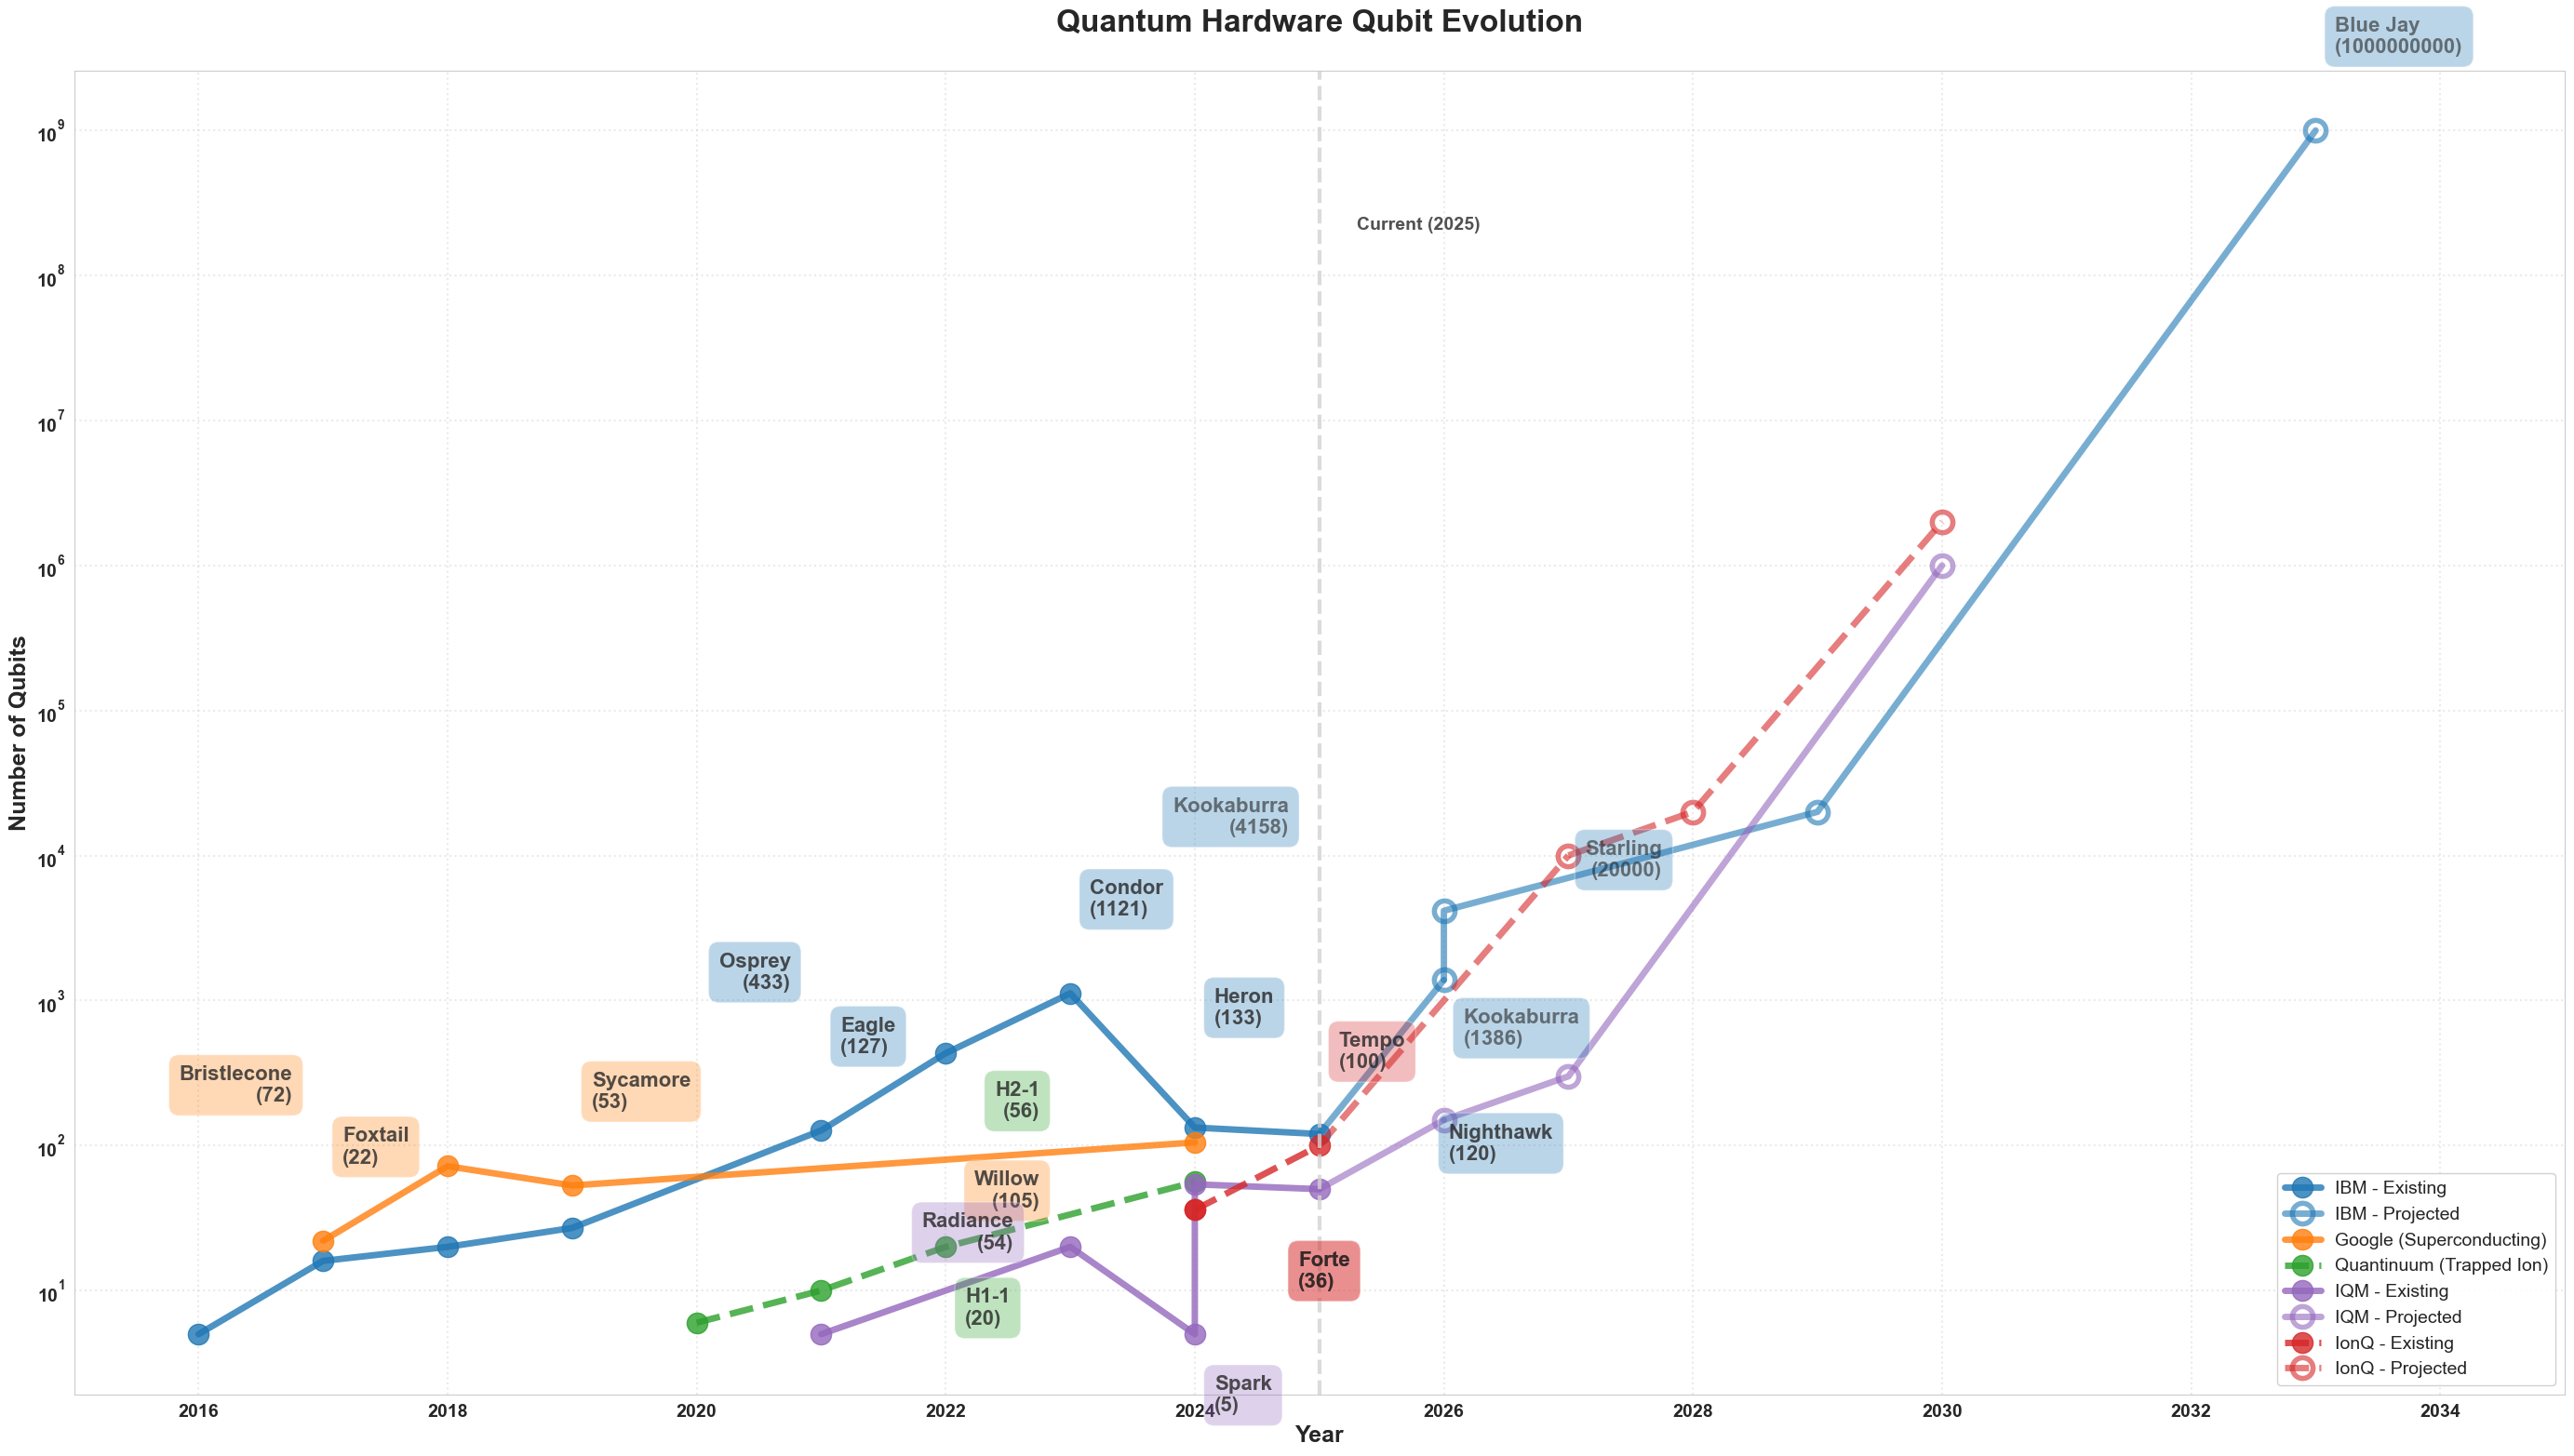

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from datetime import datetime

# Include the quantum systems data
quantum_systems = [
    # ============= PAST SYSTEMS (2016-2023) =============
    
    # IBM Historical Systems
    {"date": "2016", "model": "IBM Q Experience (5Q)", "qubits": 5, "provider": "IBM", "type": "Superconducting"},
    {"date": "2017", "model": "IBM Q 16", "qubits": 16, "provider": "IBM", "type": "Superconducting"},
    {"date": "2018", "model": "IBM Q 20", "qubits": 20, "provider": "IBM", "type": "Superconducting"},
    {"date": "2019", "model": "IBM Falcon", "qubits": 27, "provider": "IBM", "type": "Superconducting"},
    {"date": "2021", "model": "IBM Eagle", "qubits": 127, "provider": "IBM", "type": "Superconducting"},
    {"date": "2022", "model": "IBM Osprey", "qubits": 433, "provider": "IBM", "type": "Superconducting"},
    
    # Google Historical Systems
    {"date": "2017", "model": "Google Foxtail", "qubits": 22, "provider": "Google", "type": "Superconducting"},
    {"date": "2018", "model": "Google Bristlecone", "qubits": 72, "provider": "Google", "type": "Superconducting"},
    {"date": "2019", "model": "Google Sycamore", "qubits": 53, "provider": "Google", "type": "Superconducting"},
    
    # Quantinuum Historical
    {"date": "2020", "model": "Honeywell H0", "qubits": 6, "provider": "Quantinuum", "type": "Trapped Ion"},
    {"date": "2021", "model": "Honeywell H1", "qubits": 10, "provider": "Quantinuum", "type": "Trapped Ion"},
    
    # IQM Historical
    {"date": "2021", "model": "IQM Finland-1", "qubits": 5, "provider": "IQM", "type": "Superconducting"},
    {"date": "2023", "model": "IQM Finland-2", "qubits": 20, "provider": "IQM", "type": "Superconducting"},
    
    # ============= CURRENT SYSTEMS (2024-2025) =============
    
    # IBM Current Systems
    {"date": "2024", "model": "IBM Heron", "qubits": 133, "provider": "IBM", "type": "Superconducting"},
    {"date": "2023", "model": "IBM Condor", "qubits": 1121, "provider": "IBM", "type": "Superconducting"},
    
    # Google Current
    {"date": "2024", "model": "Google Willow", "qubits": 105, "provider": "Google", "type": "Superconducting"},
    
    # Quantinuum Current
    {"date": "2022", "model": "Quantinuum H1-1", "qubits": 20, "provider": "Quantinuum", "type": "Trapped Ion"},
    {"date": "2024", "model": "Quantinuum H2-1", "qubits": 56, "provider": "Quantinuum", "type": "Trapped Ion"},
    
    # IonQ Current
    {"date": "2024", "model": "IonQ Forte", "qubits": 36, "provider": "IonQ", "type": "Trapped Ion"},
    {"date": "2024", "model": "IonQ Forte Enterprise", "qubits": 36, "provider": "IonQ", "type": "Trapped Ion"},
    
    # IQM Current
    {"date": "2024", "model": "IQM Spark", "qubits": 5, "provider": "IQM", "type": "Superconducting"},
    {"date": "2024", "model": "IQM Radiance", "qubits": 54, "provider": "IQM", "type": "Superconducting"},
    {"date": "2025", "model": "IQM Finland-3", "qubits": 50, "provider": "IQM", "type": "Superconducting"},
    
    # ============= NEAR-TERM FUTURE (2025-2027) =============
    
    # IBM Near-term
    {"date": "2025", "model": "IBM Nighthawk", "qubits": 120, "provider": "IBM", "type": "Superconducting"},
    {"date": "2026", "model": "IBM Kookaburra", "qubits": 1386, "provider": "IBM", "type": "Superconducting"},
    {"date": "2026", "model": "IBM Kookaburra (3x)", "qubits": 4158, "provider": "IBM", "type": "Superconducting"},
    
    # IonQ Near-term (Accelerated Roadmap)
    {"date": "2025", "model": "IonQ Tempo", "qubits": 100, "provider": "IonQ", "type": "Trapped Ion"},
    {"date": "2027", "model": "IonQ TBD (Single Chip)", "qubits": 10000, "provider": "IonQ", "type": "Trapped Ion"},
    {"date": "2028", "model": "IonQ TBD (Networked)", "qubits": 20000, "provider": "IonQ", "type": "Trapped Ion"},
    
    # IQM Near-term (Detailed Roadmap)
    {"date": "2026", "model": "IQM Finland-4", "qubits": 150, "provider": "IQM", "type": "Superconducting"},
    {"date": "2027", "model": "IQM Finland-5", "qubits": 300, "provider": "IQM", "type": "Superconducting"},
    
    # ============= LONG-TERM FUTURE (2028-2033+) =============
    
    # IBM Long-term (using estimated physical qubits for logical systems)
    {"date": "2029", "model": "IBM Starling", "qubits": 20000, "provider": "IBM", "type": "Superconducting"},  # Estimated ~100x physical for 200 logical
    {"date": "2033", "model": "IBM Blue Jay", "qubits": 1000000000, "provider": "IBM", "type": "Superconducting"},
    
    # IonQ Long-term (Major Expansion)
    {"date": "2030", "model": "IonQ TBD (2M Qubit)", "qubits": 2000000, "provider": "IonQ", "type": "Trapped Ion"},
    
    # IQM Long-term
    {"date": "2030", "model": "IQM TBD (1M Qubit)", "qubits": 1000000, "provider": "IQM", "type": "Superconducting"},
]

def parse_date(date_str):
    """Convert date string to numeric year"""
    if isinstance(date_str, int):
        return date_str
    
    date_str = str(date_str)
    
    # Handle ranges like "2025-2026"
    if "-" in date_str and not date_str.endswith("+"):
        years = date_str.split("-")
        if len(years) == 2 and years[0].isdigit() and years[1].isdigit():
            return int(years[0])  # Use start year
    
    # Handle future estimates like "2033+"
    if "+" in date_str:
        return int(date_str.replace("+", ""))
    
    # Handle single years
    if date_str.isdigit():
        return int(date_str)
    
    return None

def parse_qubits(qubit_str):
    """Convert qubit string to numeric value"""
    if isinstance(qubit_str, int):
        return qubit_str
    
    qubit_str = str(qubit_str)
    
    # Handle ranges like "80-100"
    if "-" in qubit_str and qubit_str.replace("-", "").replace(" ", "").isdigit():
        numbers = [int(x) for x in qubit_str.split("-") if x.isdigit()]
        if len(numbers) == 2:
            return sum(numbers) / 2  # Use average
    
    # Handle estimates like "450+ AQ"
    if "+" in qubit_str:
        nums = [int(x) for x in qubit_str.split() if x.replace("+", "").isdigit()]
        if nums:
            return nums[0]
    
    # Handle direct numbers
    if qubit_str.isdigit():
        return int(qubit_str)
    
    # Handle cases like "200 logical" - skip for now
    return None

def categorize_timeline(year):
    """Categorize systems by timeline - simplified to two categories"""
    if year <= 2025:
        return "existing"  # Historical and current systems
    else:
        return "projected"  # All future projections

def prepare_data_for_plotting():
    """Prepare data for plotting"""
    plot_data = []
    
    for system in quantum_systems:
        year = parse_date(system["date"])
        qubits = parse_qubits(system["qubits"])
        
        if year is not None and qubits is not None:
            plot_data.append({
                "year": year,
                "qubits": qubits,
                "provider": system["provider"],
                "model": system["model"],
                "type": system["type"],
                "timeline": categorize_timeline(year)
            })
    
    return pd.DataFrame(plot_data)

def fit_reference_curves(fitting_data):
    """Fit reference curves to existing + near-term data"""
    years = fitting_data["year"].values
    qubits = fitting_data["qubits"].values
    
    # Normalize years for better fitting
    year_offset = years.min()
    years_norm = years - year_offset
    
    fitted_curves = {}
    
    try:
        # Exponential fit: y = a * exp(b*x)
        def exponential(x, a, b):
            return a * np.exp(b * x)
        
        popt_exp, _ = curve_fit(exponential, years_norm, qubits, 
                               p0=[1, 0.3], maxfev=5000)
        fitted_curves['exponential'] = (popt_exp, year_offset)
        
        # Power law fit: y = a * x^b (more appropriate than polynomial for tech scaling)
        def power_law(x, a, b):
            # Avoid x=0 by adding small offset
            return a * (x + 1)**b
        
        popt_power, _ = curve_fit(power_law, years_norm, qubits, 
                                 p0=[1, 2], maxfev=5000)
        fitted_curves['power_law'] = (popt_power, year_offset)
        
        # Logistic fit: y = L / (1 + exp(-k*(x-x0)))
        def logistic(x, L, k, x0):
            return L / (1 + np.exp(-k * (x - x0)))
        
        # Better initial guess for logistic
        L_guess = qubits.max() * 10  # Assume current max is ~10% of carrying capacity
        k_guess = 0.4
        x0_guess = years_norm.mean()
        
        popt_log, _ = curve_fit(logistic, years_norm, qubits, 
                               p0=[L_guess, k_guess, x0_guess], 
                               maxfev=5000)
        fitted_curves['logistic'] = (popt_log, year_offset)
        
    except Exception as e:
        print(f"Warning: Curve fitting failed: {e}")
        fitted_curves = {}
    
    return fitted_curves

def plot_qubit_evolution_powerpoint():
    """PowerPoint-optimized version with larger fonts and better visibility"""
    df = prepare_data_for_plotting()
    
    colors = {
        "IBM": "#1f77b4", "Google": "#ff7f0e", "Quantinuum": "#2ca02c", 
        "IonQ": "#d62728", "IQM": "#9467bd"
    }
    
    line_styles = {
        "Superconducting": "-",
        "Trapped Ion": "--"
    }
    
    # Only these properly named systems will be annotated
    key_systems = {
        "IBM": ["Eagle", "Osprey", "Condor", "Heron", "Nighthawk", "Kookaburra", "Starling", "Blue Jay"],
        "Google": ["Sycamore", "Willow", "Bristlecone", "Foxtail"],
        "IonQ": ["Forte", "Tempo"],
        "Quantinuum": ["H1-1", "H2-1"],
        "IQM": ["Radiance", "Spark"]
    }
    
    # Even larger figure size for maximum visibility
    plt.figure(figsize=(28, 16))
    
    # Set much larger font sizes globally for PowerPoint
    plt.rcParams.update({'font.size': 18})
    
    # Separate existing and projected data
    existing_data = df[df["timeline"] == "existing"]
    projected_data = df[df["timeline"] == "projected"]
    
    # For curve fitting, include realistic near-term data (through 2027)
    # even though it's categorized as "projected" for display purposes
    fitting_data = df[df["year"] <= 2027]
    fitted_curves = fit_reference_curves(fitting_data)
    
    # Plot data by provider
    for provider in df["provider"].unique():
        provider_data = df[df["provider"] == provider].sort_values("year")
        main_type = provider_data["type"].mode().iloc[0]
        
        # Split provider data into existing and projected
        provider_existing = provider_data[provider_data["timeline"] == "existing"]
        provider_projected = provider_data[provider_data["timeline"] == "projected"]
        
        # Plot existing data with filled circles - even larger markers
        if not provider_existing.empty:
            plt.plot(provider_existing["year"], provider_existing["qubits"], 
                    marker="o", linewidth=5, markersize=16,
                    color=colors.get(provider, "#333333"),
                    linestyle=line_styles.get(main_type, "-"),
                    label=f"{provider} ({main_type})" if provider_projected.empty else f"{provider} - Existing",
                    alpha=0.8, markerfacecolor=colors.get(provider, "#333333"))
        
        # Plot projected data with empty circles - even larger markers
        if not provider_projected.empty:
            plt.plot(provider_projected["year"], provider_projected["qubits"], 
                    marker="o", linewidth=5, markersize=16,
                    color=colors.get(provider, "#333333"),
                    linestyle=line_styles.get(main_type, "-"),
                    label=f"{provider} - Projected" if not provider_existing.empty else f"{provider} ({main_type})",
                    alpha=0.6, markerfacecolor='none', markeredgewidth=4)
        
        # Connect existing and projected data if both exist
        if not provider_existing.empty and not provider_projected.empty:
            # Connect last existing point to first projected point
            last_existing = provider_existing.iloc[-1]
            first_projected = provider_projected.iloc[0]
            plt.plot([last_existing["year"], first_projected["year"]], 
                    [last_existing["qubits"], first_projected["qubits"]],
                    color=colors.get(provider, "#333333"),
                    linestyle=line_styles.get(main_type, "-"),
                    alpha=0.6, linewidth=5)
        
        # Collect all annotations for this provider first
        annotations_to_add = []
        for _, row in provider_data.iterrows():
            if provider in key_systems:
                for key_model in key_systems[provider]:
                    if key_model in row["model"]:
                        alpha_val = 0.8 if row["timeline"] == "existing" else 0.6
                        annotations_to_add.append({
                            'text': f'{key_model}\n({int(row["qubits"])})',
                            'xy': (row["year"], row["qubits"]),
                            'alpha': alpha_val,
                            'color': colors.get(provider, "#333333"),
                            'year': row["year"],
                            'qubits': row["qubits"],
                            'provider': provider,
                            'system': key_model
                        })
                        break
        
        # Apply smart positioning with improved collision avoidance
        for i, ann in enumerate(annotations_to_add):
            system_name = ann['text'].split('\n')[0]
            year = ann['year']
            provider = ann['provider']
            
            # Define base offsets with better separation for even larger figure
            if system_name == 'Heron':
                offset = (15, 80)  # Move Heron up
            elif system_name == 'Willow':
                offset = (-120, -50)  # Move Willow down-left
            elif system_name == 'Nighthawk':
                offset = (100, -20)  # Move Nighthawk right and up to avoid Forte overlap
            elif system_name == 'H2-1':
                offset = (-120, 50)  # Move H2-1 up-left
            elif system_name == 'Forte':
                offset = (80, -60)  # Move Forte right-down
            elif system_name == 'Radiance':
                offset = (-140, -50)  # Move Radiance left-down
            elif system_name == 'Finland-3':
                offset = (15, -80)  # Move Finland-3 down
            elif provider == 'IBM' and year >= 2026:
                # For future IBM systems, spread them out more
                ibm_offsets = [(15, 60), (15, -50), (-120, 60), (-120, -50)]
                offset = ibm_offsets[i % len(ibm_offsets)]
            elif provider == 'IonQ' and year >= 2027:
                # For future IonQ systems, use upper space
                offset = (15, 100)
            elif provider in ['IQM', 'Quantinuum']:
                # Use more varied positioning for these providers
                varied_offsets = [(15, -60), (-120, -50), (80, -60), (-140, 50)]
                offset = varied_offsets[i % len(varied_offsets)]
            else:
                # Default positioning with more separation
                if year <= 2025:
                    offset = (15, 60) if i % 2 == 0 else (-120, 50)
                else:
                    offset = (15, -60) if i % 2 == 0 else (-120, -50)
            
            ha = 'right' if offset[0] < 0 else 'left'
            
            plt.annotate(ann['text'], ann['xy'],
                        xytext=offset, textcoords='offset points',
                        fontsize=16, alpha=ann['alpha'], fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.5", 
                                facecolor=ann['color'], alpha=0.3),
                        ha=ha)
    
    # Plot fitted reference curves (based on realistic data through 2027)
    years_ref = np.linspace(2016, 2035, 100)
    
    plt.xlabel("Year", fontsize=18, fontweight="bold")
    plt.ylabel("Number of Qubits", fontsize=18, fontweight="bold")
    plt.title("Quantum Hardware Qubit Evolution", fontsize=24, fontweight="bold", pad=30)
    
    # Use log scale for y-axis due to wide range
    plt.yscale("log")
    plt.grid(True, alpha=0.4, linestyle=":", linewidth=1.5)
    
    # Customize legend with larger font
    plt.legend(loc='lower right', fontsize=14, framealpha=0.9)
    
    # Set x-axis limits
    plt.xlim(2015, 2035)
    
    # Add vertical line for existing/projected boundary with thicker line
    plt.axvline(x=2025, color='lightgray', linestyle='--', alpha=0.8, linewidth=3)
    plt.text(2025.3, plt.ylim()[1]*0.08, 'Current (2025)', rotation=0, fontsize=14, 
             alpha=0.8, fontweight='bold')
    
    # Set integer-only ticks for x-axis with larger font
    from matplotlib.ticker import MaxNLocator
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("quantum_qubit_projections_powerpoint.png", dpi=600, bbox_inches='tight')
    plt.savefig("quantum_qubit_projections_powerpoint.pdf", bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Creating maximum-visibility PowerPoint quantum computer evolution plot...")
    print("- Extra large fonts and markers for optimal screen readability")
    print("- High-resolution output (600 DPI) for crystal-clear projection")
    print("- Filled circles: Existing hardware (≤2025)")
    print("- Empty circles: Projected systems (>2025)")
    print("- Saving as both PNG (ultra high-res) and PDF formats")
    
    plot_qubit_evolution_powerpoint()